In [1]:
from pathlib import Path

directory_path = Path('ML_plp')

data = [['beta','time','real','imag','norm','temp']]
# Iterate through files in the directory
for file_path in directory_path.iterdir():
    if file_path.is_file():
        beta = float(file_path.name[11:])
        temp = 0
        if beta>= 5.692:
            temp = 1
        with open(file_path, 'r') as file:
            lines = file.readlines()
            counter = 0
            for line in lines:
                if counter == 0:
                    if 'PLP_n_PLQ' in line:
                        real = float(line.split()[1])
                        imag = float(line.split()[2])
                        norm = (real**2 + imag**2)**0.5
                        counter = 1
                elif counter == 1:
                    if 'Time =' in line:
                        time = float(line.split()[2])
                        counter = 2
                    #print(beta,time,real,imag,norm,temp)
                if counter == 2:
                    data.append([beta,time,real,imag,norm,temp])
                    counter = 0

In [2]:
#convert your array into a dataframe
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['beta','time','real','imag','norm','temp']
# convert rows to float
df = df[1:].astype(float)
df.head()

# make seperate dataframes for based on beta value
df_beta = df.groupby('beta')
df_beta = {k: v for k, v in df_beta}
df_beta[5.6].tail()

,beta,time,real,imag,norm,temp
997,5.6,8.711810,0.003374,0.003862,0.005128,0.0
998,5.6,8.738259,0.014153,0.009100,0.016826,0.0
999,5.6,8.674391,0.011135,0.008454,0.013981,0.0
1000,5.6,8.720201,0.020020,0.010958,0.022823,0.0
1001,5.6,8.747325,0.018065,0.002749,0.018273,0.0


In [3]:
# calculate autocorrelation time for each beta
# making seperate lists of norm for each beta
norm_list = []
for beta in df_beta:
    norm_list.append(df_beta[beta]['norm'].tolist())


In [4]:
real_list = []
for beta in df_beta:
    real_list.append(df_beta[beta]['real'].tolist())

imag_list = []
for beta in df_beta:
    imag_list.append(df_beta[beta]['imag'].tolist())

In [5]:
len(norm_list)

10

In [6]:
list(df_beta.keys())

[5.6, 5.65, 5.67, 5.68, 5.692, 5.7, 5.75, 5.8, 5.85, 5.9]

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import project as pe
#plt.style.use('./base_style.mplstyle')
import shutil
usetex = shutil.which('latex') not in ('', None)
plt.rc('text', usetex=usetex)


$$\tau_\mathrm{int}=\frac{1}{2}+\sum_{t=1}^{W}\rho(t)\geq \frac{1}{2}\,.$$


In [8]:
sample = pe.Obs(norm_list, [str(i) for i in list(df_beta.keys())])

In [14]:
sample.gamma_method(S = 2)
print(sample)

0.335(23)


In [15]:
sample.details()

Result	 3.35304578e-01 +/- 2.31652181e-02 +/- 6.20265790e-03 (6.909%)
 Ensemble errors:
 5.6 	 8.431982e-04 +/- 1.319155e-04
 τ_int	 4.2(1.1) in units of 1 config        	(S=2.00)
 5.65 	 2.469135e-03 +/- 6.169754e-04
 τ_int	 15.9(6.2) in units of 1 config       	(S=2.00)
 5.67 	 2.556771e-03 +/- 6.880877e-04
 τ_int	 20.1(8.2) in units of 1 config       	(S=2.00)
 5.68 	 2.018796e-02 +/- 7.004369e-03
 τ_int	 108(32) in units of 1 config         	(S=2.00)
 5.692 	 8.658741e-03 +/- 2.850707e-03
 τ_int	 42(19) in units of 1 config          	(S=2.00)
 5.7 	 3.583707e-03 +/- 9.096939e-04
 τ_int	 16.7(6.6) in units of 1 config       	(S=2.00)
 5.75 	 4.046668e-03 +/- 1.147568e-03
 τ_int	 24(10) in units of 1 config          	(S=2.00)
 5.8 	 2.750948e-03 +/- 6.706930e-04
 τ_int	 14.8(5.7) in units of 1 config       	(S=2.00)
 5.85 	 1.206163e-03 +/- 1.887001e-04
 τ_int	 4.2(1.1) in units of 1 config        	(S=2.00)
 5.9 	 1.585548e-03 +/- 2.943553e-04
 τ_int	 6.8(2.1) in units of 1 config   

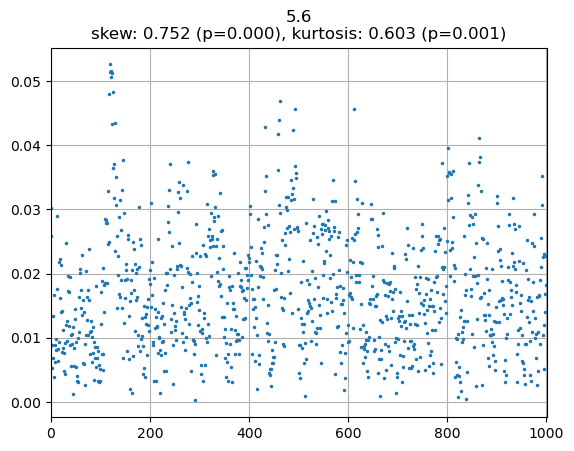

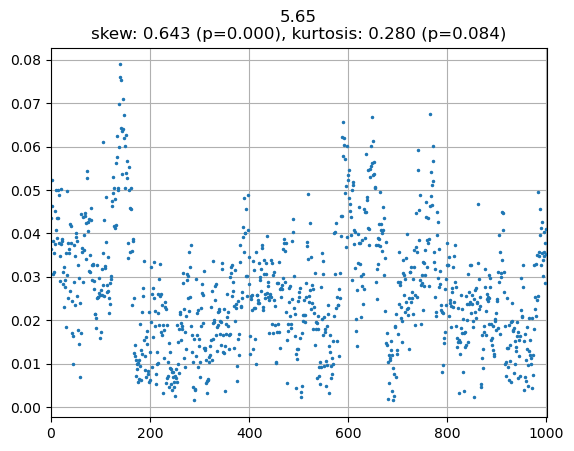

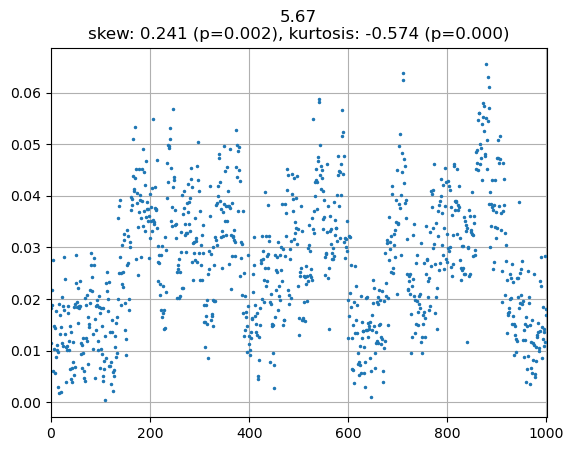

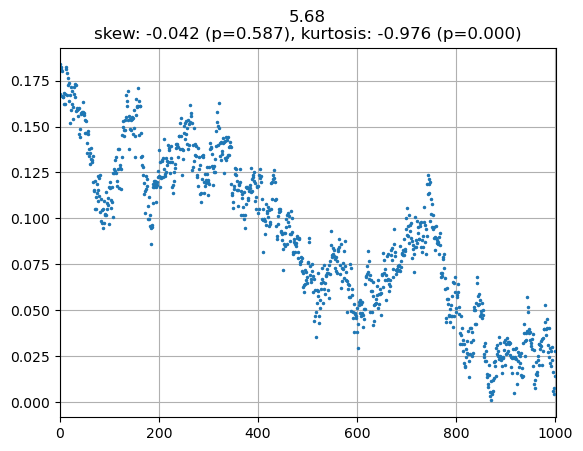

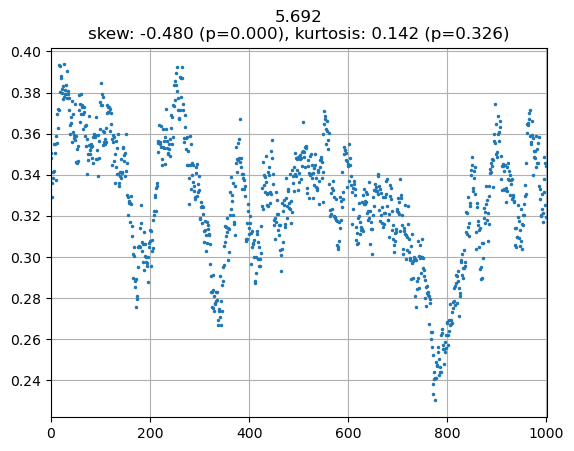

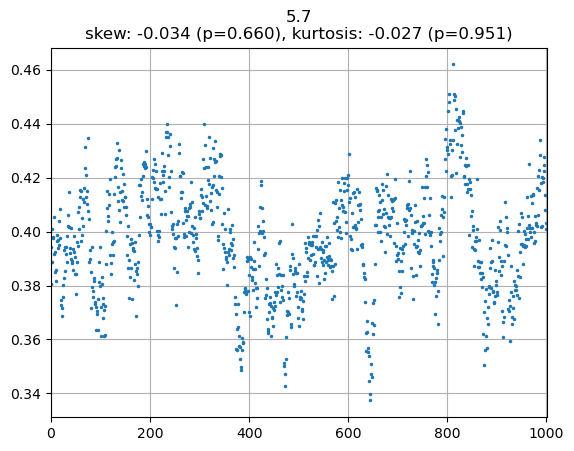

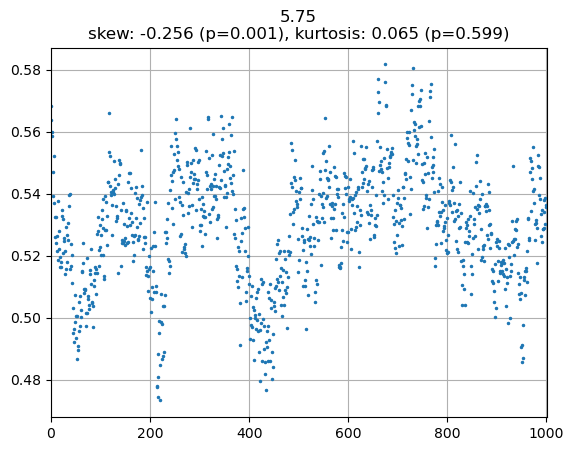

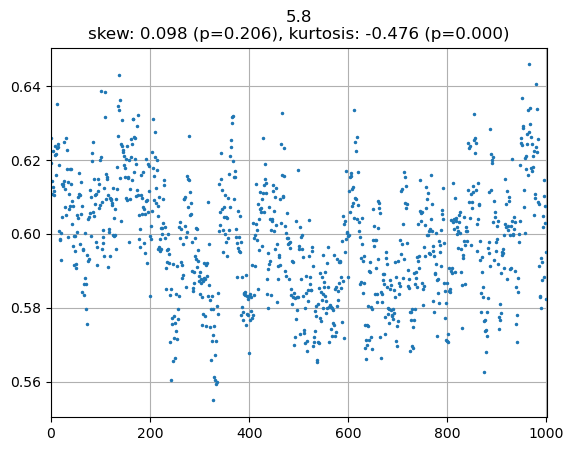

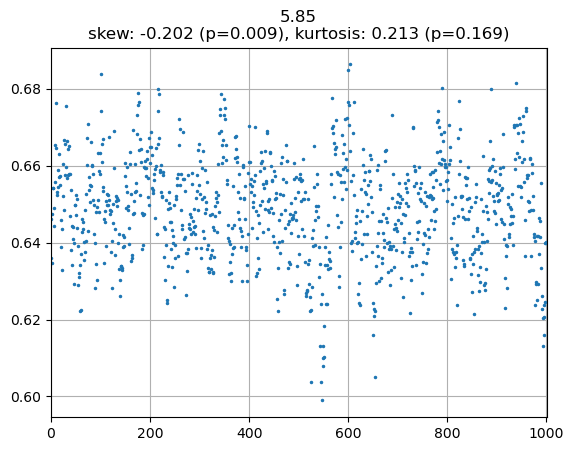

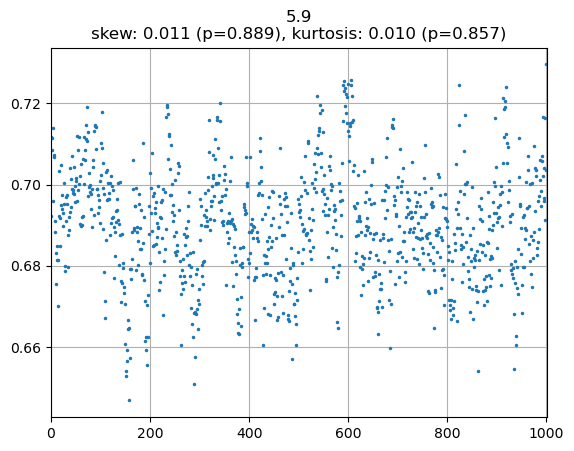

In [16]:
sample.plot_history()

Window size for beta =  5.6 : 24 Tau_int =  4.0
Window size for beta =  5.65 : 62 Tau_int =  14.11
Window size for beta =  5.67 : 72 Tau_int =  17.54
Window size for beta =  5.68 : 120 Tau_int =  87.32
Window size for beta =  5.692 : 108 Tau_int =  34.21
Window size for beta =  5.7 : 64 Tau_int =  14.8
Window size for beta =  5.75 : 80 Tau_int =  20.87
Window size for beta =  5.8 : 59 Tau_int =  13.2
Window size for beta =  5.85 : 24 Tau_int =  3.99
Window size for beta =  5.9 : 34 Tau_int =  6.36


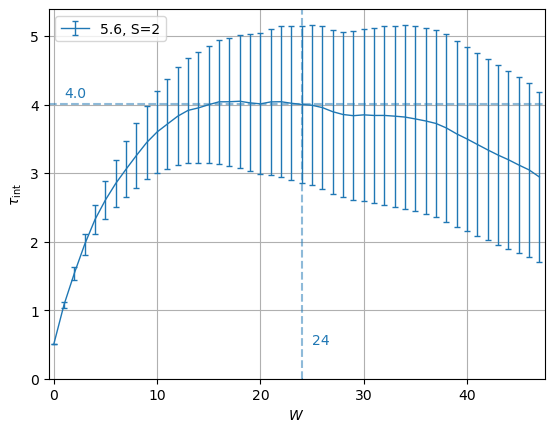

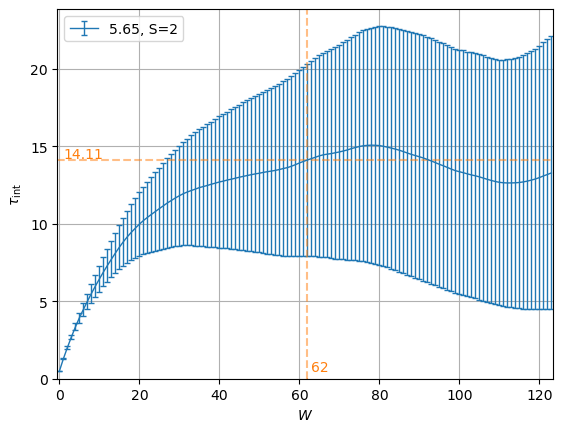

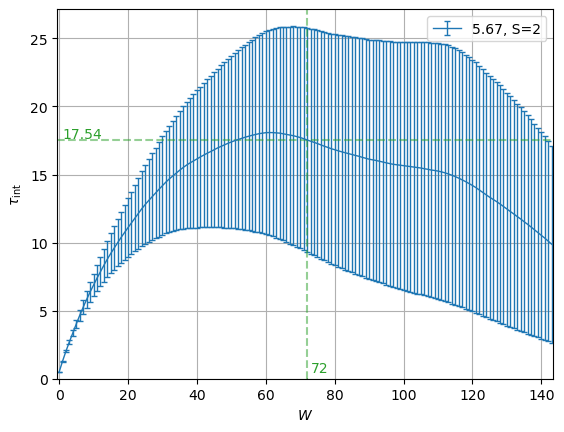

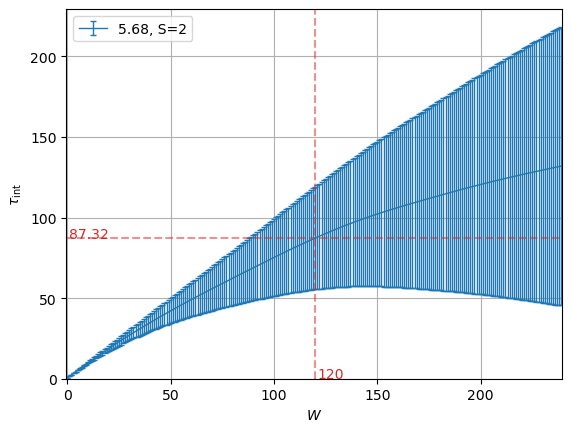

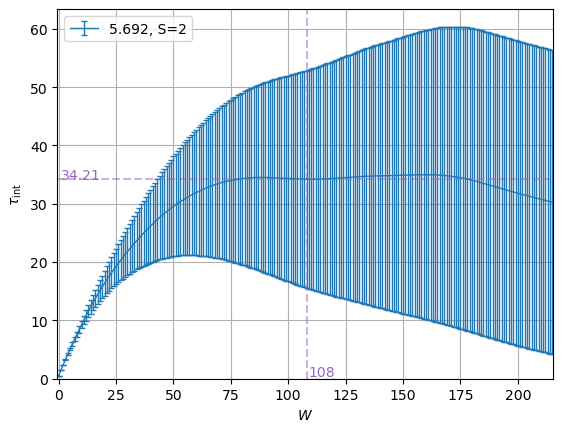

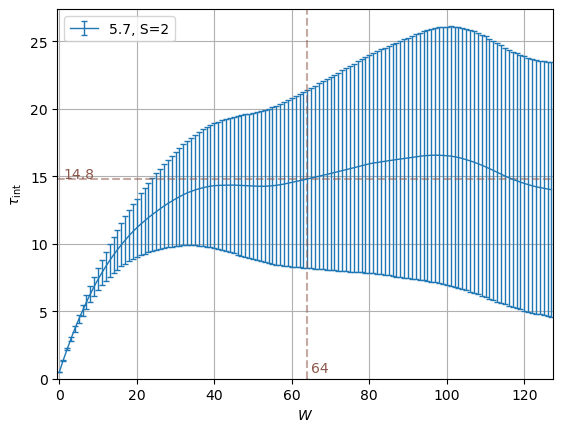

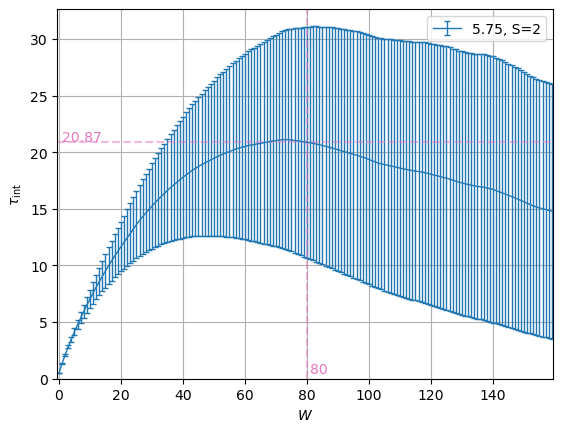

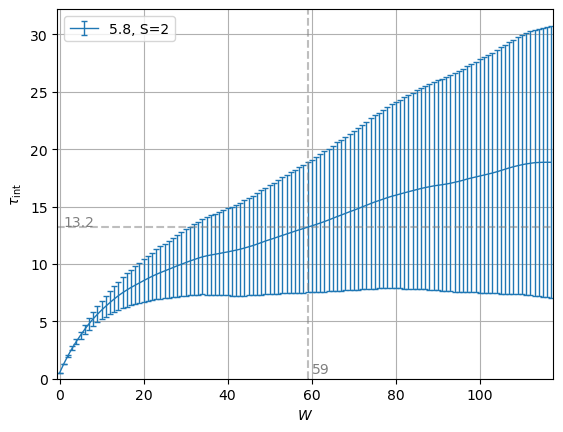

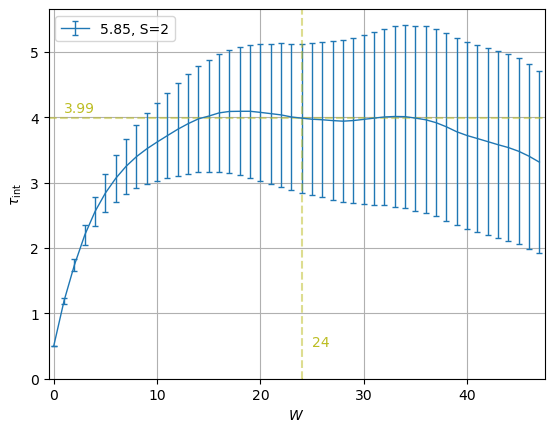

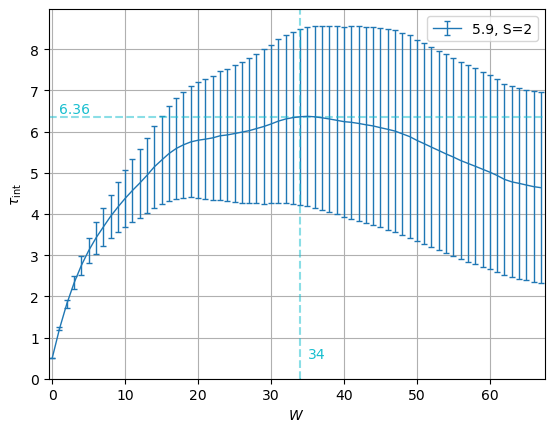

In [17]:
sample.plot_tauint()

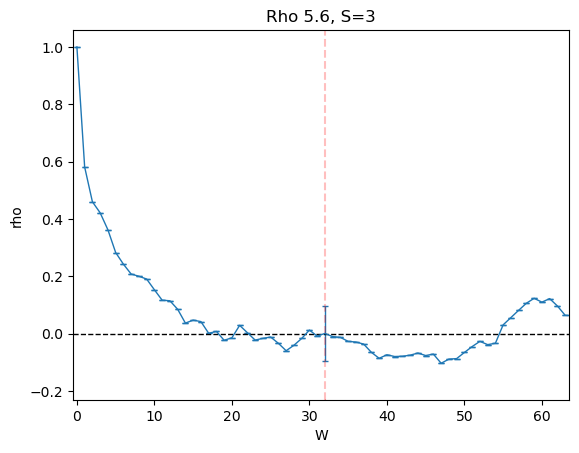

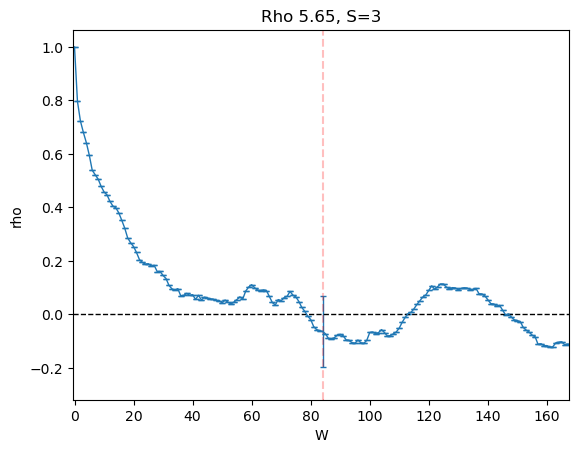

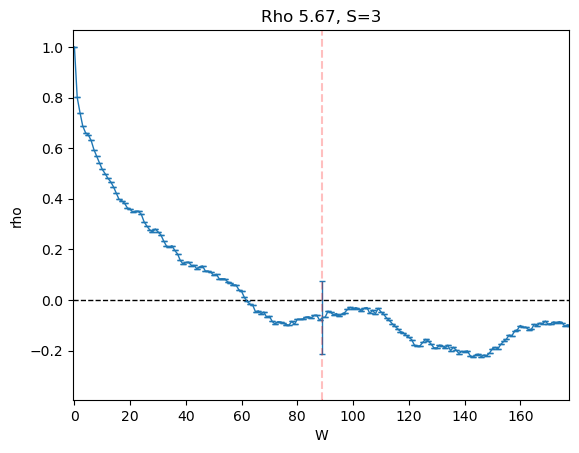

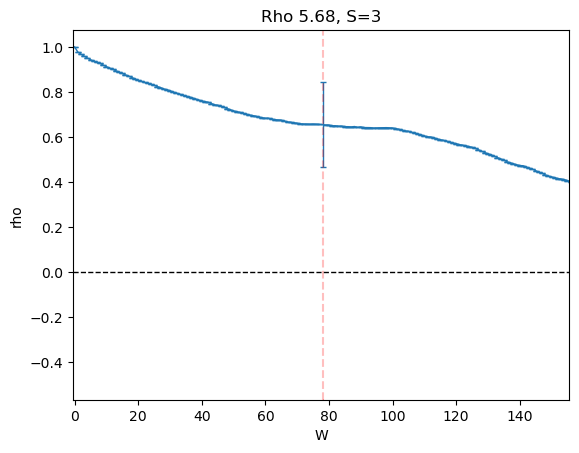

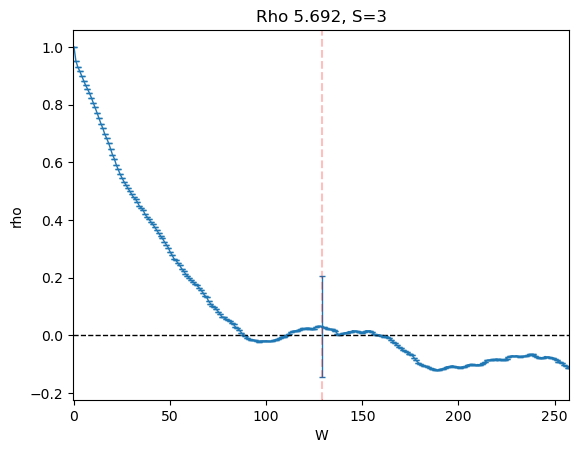

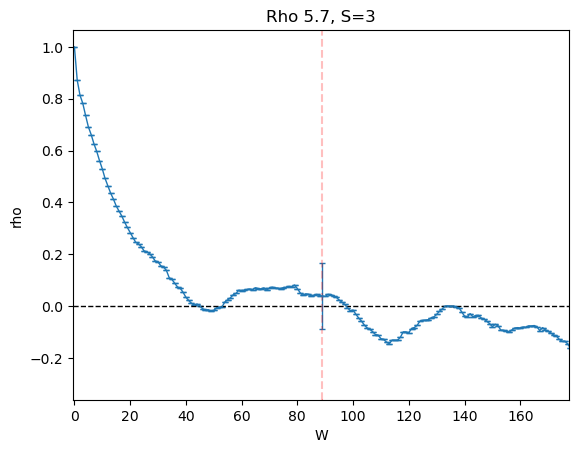

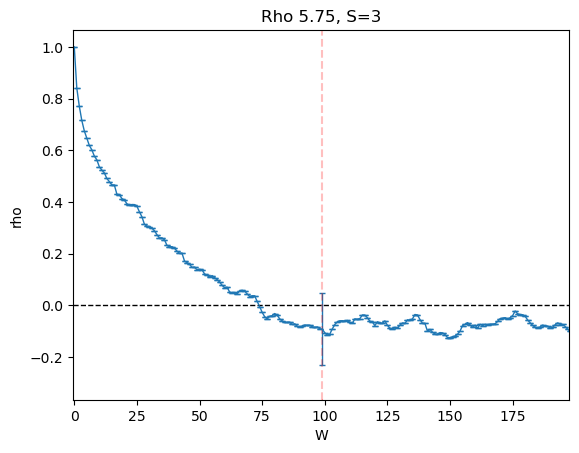

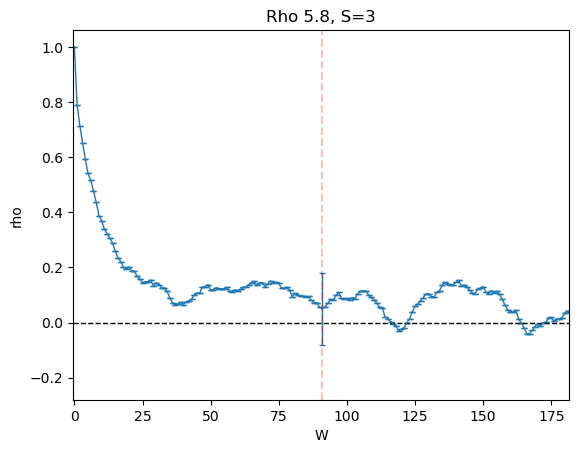

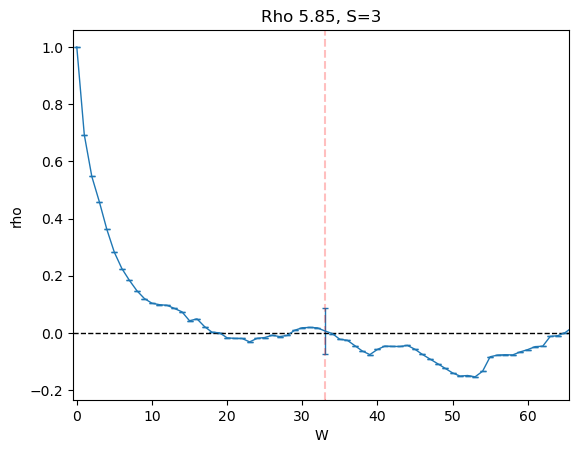

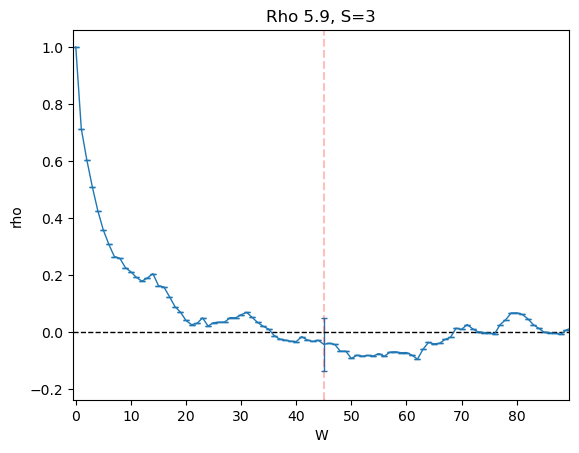

In [13]:
sample.plot_rho()